In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
train_data = pd.read_csv('train.csv')
# test_data = pd.read_csv('test.csv')
# test_y = pd.read_csv('sample_submission.csv')
# test_y = test_y.drop(['Id'], axis = 1)
# test_data = pd.concat((test_data,test_y), axis = 1)

In [3]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### *Data Cleaning*

In [4]:
#Combining the test and train datasets for data cleaning


full_data = train_data


In [5]:
full_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
#Dropping the features which have more than 80% missing values

full_data = full_data.dropna(thresh = len(full_data)*0.8, axis = 1)

In [7]:
# Now the total features have been reduced to 75 from 81 where total number of samples are 75.

print(full_data.shape[0])
print(full_data.shape[1])

1460
76


In [8]:
#Dividing the features into numerical and categorical variables

cat_feat = full_data.select_dtypes(include = 'object')
num_feat = full_data.select_dtypes(exclude = 'object')

In [9]:
all_mv_feat = (full_data.isnull().sum() / len(full_data))*100
all_mv_feat.sort_values()

Id                0.000000
SaleCondition     0.000000
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
                   ...    
GarageQual        5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
LotFrontage      17.739726
Length: 76, dtype: float64

In [10]:
type(all_mv_feat)

pandas.core.series.Series

In [11]:

# Now after removing the features we see fill the missing values in the rest of the table

all_mv_feat = all_mv_feat.drop(all_mv_feat[all_mv_feat == 0].index).sort_values()

In [12]:
mv = full_data[all_mv_feat.index.to_list()]
mv

,Electrical,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtFinType1,BsmtExposure,BsmtFinType2,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,LotFrontage
0,SBrkr,BrkFace,196.0,Gd,TA,GLQ,No,Unf,Attchd,2003.0,RFn,TA,TA,65.0
1,SBrkr,None,0.0,Gd,TA,ALQ,Gd,Unf,Attchd,1976.0,RFn,TA,TA,80.0
2,SBrkr,BrkFace,162.0,Gd,TA,GLQ,Mn,Unf,Attchd,2001.0,RFn,TA,TA,68.0
3,SBrkr,None,0.0,TA,Gd,ALQ,No,Unf,Detchd,1998.0,Unf,TA,TA,60.0
4,SBrkr,BrkFace,350.0,Gd,TA,GLQ,Av,Unf,Attchd,2000.0,RFn,TA,TA,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,SBrkr,None,0.0,Gd,TA,Unf,No,Unf,Attchd,1999.0,RFn,TA,TA,62.0
1456,SBrkr,Stone,119.0,Gd,TA,ALQ,No,Rec,Attchd,1978.0,Unf,TA,TA,85.0
1457,SBrkr,None,0.0,TA,Gd,GLQ,No,Unf,Attchd,1941.0,RFn,TA,TA,66.0
1458,FuseA,None,0.0,TA,TA,GLQ,Mn,Rec,Attchd,1950.0,Unf,TA,TA,68.0


In [13]:
print(mv.shape[0])
print(mv.shape[1])

1460
14


In [14]:

mv_cat_feat = mv.select_dtypes(include = 'object')
mv_num_feat = mv.select_dtypes(exclude = 'object')

In [15]:
# We are filling the values for top 3 features with highest missing values (numericla features)

mv_num_feat.isnull().sum()

MasVnrArea       8
GarageYrBlt     81
LotFrontage    259
dtype: int64

In [16]:
print(mv_cat_feat.shape[1])
print(mv_num_feat.shape[1])

11
3


In [17]:
mv_cat_feat.isnull().sum()

Electrical       1
MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
BsmtExposure    38
BsmtFinType2    38
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [18]:
lf = list(mv_num_feat['LotFrontage'].isnull().values)
lf_ls = []
for i in range(len(lf)):
    if lf[i] == True:
        lf_ls.append(i)
full_data['LotConfig'][lf_ls].unique()

array(['Corner', 'Inside', 'CulDSac', 'FR2'], dtype=object)

In [19]:
# ** GARAGE FEATURE CLEANING**

In [20]:
# ga = mv_num_feat[mv_num_feat['GarageArea'] == 0].index.to_list()
# gc = mv_num_feat[mv_num_feat['GarageCars'] == 0].index.to_list()

mv_num_feat = mv_num_feat.drop(['GarageYrBlt'], axis = 1)

In [21]:
gt = list(mv_cat_feat['GarageType'].isnull().values)

In [22]:
lst = []
for idx,i in enumerate(gt):
       if i == True:
            lst.append(idx)

In [23]:
# Lot Frontage has more than 16% missing values. Filling them with median.
mv_num_feat['LotFrontage']=mv_num_feat.LotFrontage.fillna(mv_num_feat.LotFrontage.median())

In [24]:
# In these 157 indices, the garage doesnt exist as the garage area is 0 for these indices. Hence filling them with
# None.
mv_cat_feat['GarageCond'].loc[gt] = 'None'
mv_cat_feat['GarageQual'].loc[gt] = 'None'
mv_cat_feat['GarageFinish'].loc[gt] = 'None'
mv_cat_feat['GarageType'].loc[gt] = 'None'

C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [25]:
# ** BASEMENT FEATURE CLEANING**

In [26]:
bsmt = full_data[full_data['TotalBsmtSF'] == 0].index.to_list()
len(bsmt)

37

In [27]:
# ** Cleaning the categorical features for basement where the basement does not exist**
mv_cat_feat['BsmtFinType1'].loc[bsmt] = 'None'
mv_cat_feat['BsmtQual'].loc[bsmt] = 'None'
mv_cat_feat['BsmtFinType2'].loc[bsmt] = 'None'
mv_cat_feat['BsmtCond'].loc[bsmt] = 'None'
mv_cat_feat['BsmtExposure'].loc[bsmt] = 'None'

C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing t

In [28]:
# ** MASONRY FEATURE CLEANING**

msn =list(mv_num_feat['MasVnrArea'].isnull())
msn_ls = []
for i in range(len(msn)):
    if msn[i] == True:
        msn_ls.append(i)
mv_cat_feat['MasVnrType'].loc[msn_ls] = 'None'
mv_num_feat['MasVnrArea'].loc[msn_ls] = 0

C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
mv_cat_feat.isnull().sum()

Electrical      1
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtFinType1    0
BsmtExposure    1
BsmtFinType2    1
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [30]:
mv_num_feat.isnull().sum()

MasVnrArea     0
LotFrontage    0
dtype: int64

In [31]:
cat_cols_mv = ['Electrical','BsmtExposure','BsmtFinType2']

for cols in cat_cols_mv:
    mv_cat_feat[cols] = mv_cat_feat[cols].fillna(method = 'ffill')


C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [32]:
print('Missing values in Categorical Features after cleaning : ')
mv_cat_feat.isnull().sum()

Missing values in Categorical Features after cleaning : 


Electrical      0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtFinType1    0
BsmtExposure    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [33]:
print('Missing values in the numerical features after cleaning :')
mv_num_feat.isnull().sum()

Missing values in the numerical features after cleaning :


MasVnrArea     0
LotFrontage    0
dtype: int64

In [34]:
# ** Combining the data altogether to get the final cleaned version of data**

temp_data = pd.concat((mv_cat_feat, mv_num_feat), sort=False, axis = 1).reset_index(drop=True)
all_columns = list(full_data.columns)
temp_columns = list(temp_data.columns)
rem_columns = list(set(all_columns) - set(temp_columns))

rem_data = full_data[rem_columns]

cleaned_data = pd.concat((temp_data,rem_data), sort = False, axis = 1).reset_index(drop = True)

In [35]:
cleaned_data = cleaned_data.drop(['SalePrice'], axis = 1)
sp = full_data['SalePrice']
cleaned_data = pd.concat((cleaned_data, sp), axis = 1)

In [36]:
# ** droping features which are useless**
cleaned_data = cleaned_data.drop(['MoSold','MiscVal','YearBuilt'], axis = 1)

In [37]:
cleaned_data['OverallQC'] = (cleaned_data['OverallCond'] + cleaned_data['OverallQual'])/2

In [38]:
for i in range(len(cleaned_data['OverallQC'])):
    cleaned_data['OverallQC'][i] = math.ceil(cleaned_data['OverallQC'][i])

C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
cleaned_data = cleaned_data.drop(['OverallCond','OverallQual'], axis = 1)

In [40]:
# Combining features to get the age of the house.
cleaned_data['PresentAge'] = cleaned_data['YrSold'] - cleaned_data['YearRemodAdd']
cleaned_data = cleaned_data.drop(['YrSold','YearRemodAdd'], axis = 1)

In [196]:
# cat = cleaned.select_dtypes(include = 'object')
num = cleaned_data.select_dtypes(exclude = 'object')
len(num)

1460

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

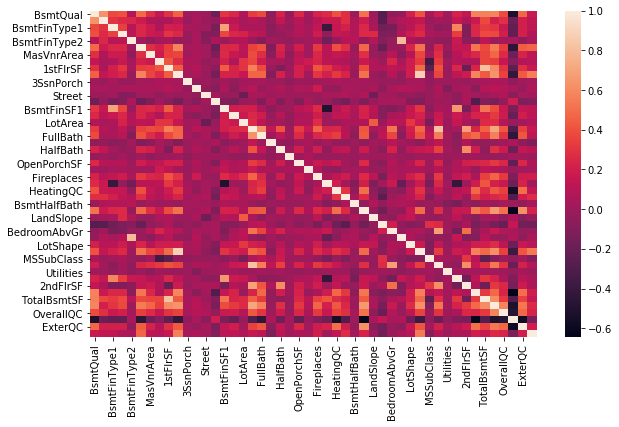

In [195]:
import seaborn as sns
plt.figure(figsize= (10,6))
sns.heatmap(num.corr())

In [41]:
#Exterior Qual encoding
cleaned_data['ExterQual'][list(cleaned_data[cleaned_data['ExterQual'] == 'Ex'].index)] = 5
cleaned_data['ExterQual'][list(cleaned_data[cleaned_data['ExterQual'] == 'Gd'].index)] = 4
cleaned_data['ExterQual'][list(cleaned_data[cleaned_data['ExterQual'] == 'TA'].index)] = 3
cleaned_data['ExterQual'][list(cleaned_data[cleaned_data['ExterQual'] == 'Fa'].index)] = 2
cleaned_data['ExterQual'][list(cleaned_data[cleaned_data['ExterQual'] == 'Po'].index)] = 1

#ExteriorCond encoding
cleaned_data['ExterCond'][list(cleaned_data[cleaned_data['ExterCond'] == 'Ex'].index)] = 5
cleaned_data['ExterCond'][list(cleaned_data[cleaned_data['ExterCond'] == 'Gd'].index)] = 4
cleaned_data['ExterCond'][list(cleaned_data[cleaned_data['ExterCond'] == 'TA'].index)] = 3
cleaned_data['ExterCond'][list(cleaned_data[cleaned_data['ExterCond'] == 'Fa'].index)] = 2
cleaned_data['ExterCond'][list(cleaned_data[cleaned_data['ExterCond'] == 'Po'].index)] = 1

C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing t

In [42]:
#Combining ExterioQual and ExteriorCond into ExterQC
cleaned_data['ExterQC'] = (cleaned_data['ExterCond'] + cleaned_data['ExterQual'])/2
cleaned_data = cleaned_data.drop(['ExterCond','ExterQual'], axis = 1)

for i in range(len(cleaned_data['ExterQC'])):
    cleaned_data['ExterQC'][i] = math.ceil(cleaned_data['ExterQC'][i])

C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
# Encoding the ordinal features and making them numerical

# Street feature encoding
cleaned_data['Street'][list(cleaned_data[cleaned_data['Street'] == 'Grvl'].index)] = 0
cleaned_data['Street'][list(cleaned_data[cleaned_data['Street'] == 'Pave'].index)] = 1

# Lot Shape encoding
cleaned_data['LotShape'][list(cleaned_data[cleaned_data['LotShape'] == 'Reg'].index)] = 0
cleaned_data['LotShape'][list(cleaned_data[cleaned_data['LotShape'] == 'IR1'].index)] = 1
cleaned_data['LotShape'][list(cleaned_data[cleaned_data['LotShape'] == 'IR2'].index)] = 2
cleaned_data['LotShape'][list(cleaned_data[cleaned_data['LotShape'] == 'IR3'].index)] = 3

# Utilities encoding
cleaned_data['Utilities'][list(cleaned_data[cleaned_data['Utilities'] == 'AllPub'].index)] = 4
cleaned_data['Utilities'][list(cleaned_data[cleaned_data['Utilities'] == 'NoSewr'].index)] = 3
cleaned_data['Utilities'][list(cleaned_data[cleaned_data['Utilities'] == 'NoSeWa'].index)] = 2
cleaned_data['Utilities'][list(cleaned_data[cleaned_data['Utilities'] == 'ELO'].index)] = 1

#LandSlope feature encoding
cleaned_data['LandSlope'][list(cleaned_data[cleaned_data['LandSlope'] == 'Gtl'].index)] = 1
cleaned_data['LandSlope'][list(cleaned_data[cleaned_data['LandSlope'] == 'Mod'].index)] = 2
cleaned_data['LandSlope'][list(cleaned_data[cleaned_data['LandSlope'] == 'Sev'].index)] = 3


    
#BsmtQual encoding
cleaned_data['BsmtQual'][list(cleaned_data[cleaned_data['BsmtQual'] == 'Ex'].index)] = 5
cleaned_data['BsmtQual'][list(cleaned_data[cleaned_data['BsmtQual'] == 'Gd'].index)] = 4
cleaned_data['BsmtQual'][list(cleaned_data[cleaned_data['BsmtQual'] == 'TA'].index)] = 3
cleaned_data['BsmtQual'][list(cleaned_data[cleaned_data['BsmtQual'] == 'Fa'].index)] = 2
cleaned_data['BsmtQual'][list(cleaned_data[cleaned_data['BsmtQual'] == 'Po'].index)] = 1

#BsmtCond encoding
cleaned_data['BsmtCond'][list(cleaned_data[cleaned_data['BsmtCond'] == 'Ex'].index)] = 5
cleaned_data['BsmtCond'][list(cleaned_data[cleaned_data['BsmtCond'] == 'Gd'].index)] = 4
cleaned_data['BsmtCond'][list(cleaned_data[cleaned_data['BsmtCond'] == 'TA'].index)] = 3
cleaned_data['BsmtCond'][list(cleaned_data[cleaned_data['BsmtCond'] == 'Fa'].index)] = 2
cleaned_data['BsmtCond'][list(cleaned_data[cleaned_data['BsmtCond'] == 'Po'].index)] = 1
cleaned_data['BsmtCond'][list(cleaned_data[cleaned_data['BsmtCond'] == 'None'].index)] = 0

#BsmtExposure
cleaned_data['BsmtExposure'][list(cleaned_data[cleaned_data['BsmtExposure'] == 'Gd'].index)] = 4
cleaned_data['BsmtExposure'][list(cleaned_data[cleaned_data['BsmtExposure'] == 'Av'].index)] = 3
cleaned_data['BsmtExposure'][list(cleaned_data[cleaned_data['BsmtExposure'] == 'Mn'].index)] = 2
cleaned_data['BsmtExposure'][list(cleaned_data[cleaned_data['BsmtExposure'] == 'No'].index)] = 1
cleaned_data['BsmtExposure'][list(cleaned_data[cleaned_data['BsmtExposure'] == 'None'].index)] = 0

#BsmtFinType1 encoding
cleaned_data['BsmtFinType1'][list(cleaned_data[cleaned_data['BsmtFinType1'] == 'GLQ'].index)] = 6
cleaned_data['BsmtFinType1'][list(cleaned_data[cleaned_data['BsmtFinType1'] == 'ALQ'].index)] = 5
cleaned_data['BsmtFinType1'][list(cleaned_data[cleaned_data['BsmtFinType1'] == 'BLQ'].index)] = 4
cleaned_data['BsmtFinType1'][list(cleaned_data[cleaned_data['BsmtFinType1'] == 'Rec'].index)] = 3
cleaned_data['BsmtFinType1'][list(cleaned_data[cleaned_data['BsmtFinType1'] == 'LwQ'].index)] = 2
cleaned_data['BsmtFinType1'][list(cleaned_data[cleaned_data['BsmtFinType1'] == 'Unf'].index)] = 1
cleaned_data['BsmtFinType1'][list(cleaned_data[cleaned_data['BsmtFinType1'] == 'None'].index)] = 0

#BsmtFinType2 encoding
cleaned_data['BsmtFinType2'][list(cleaned_data[cleaned_data['BsmtFinType2'] == 'GLQ'].index)] = 6
cleaned_data['BsmtFinType2'][list(cleaned_data[cleaned_data['BsmtFinType2'] == 'ALQ'].index)] = 5
cleaned_data['BsmtFinType2'][list(cleaned_data[cleaned_data['BsmtFinType2'] == 'BLQ'].index)] = 4
cleaned_data['BsmtFinType2'][list(cleaned_data[cleaned_data['BsmtFinType2'] == 'Rec'].index)] = 3
cleaned_data['BsmtFinType2'][list(cleaned_data[cleaned_data['BsmtFinType2'] == 'LwQ'].index)] = 2
cleaned_data['BsmtFinType2'][list(cleaned_data[cleaned_data['BsmtFinType2'] == 'Unf'].index)] = 1
cleaned_data['BsmtFinType2'][list(cleaned_data[cleaned_data['BsmtFinType2'] == 'None'].index)] = 0

#HeatingQC encoding
cleaned_data['HeatingQC'][list(cleaned_data[cleaned_data['HeatingQC'] == 'Ex'].index)] = 5
cleaned_data['HeatingQC'][list(cleaned_data[cleaned_data['HeatingQC'] == 'Gd'].index)] = 4
cleaned_data['HeatingQC'][list(cleaned_data[cleaned_data['HeatingQC'] == 'TA'].index)] = 3
cleaned_data['HeatingQC'][list(cleaned_data[cleaned_data['HeatingQC'] == 'Fa'].index)] = 2
cleaned_data['HeatingQC'][list(cleaned_data[cleaned_data['HeatingQC'] == 'Po'].index)] = 1

#CentralAir encoding
cleaned_data['CentralAir'][list(cleaned_data[cleaned_data['CentralAir'] == 'Y'].index)] = 1
cleaned_data['CentralAir'][list(cleaned_data[cleaned_data['CentralAir'] == 'N'].index)] = 0

#KitchenQual encoding
cleaned_data['KitchenQual'][list(cleaned_data[cleaned_data['KitchenQual'] == 'Ex'].index)] = 5
cleaned_data['KitchenQual'][list(cleaned_data[cleaned_data['KitchenQual'] == 'Gd'].index)] = 4
cleaned_data['KitchenQual'][list(cleaned_data[cleaned_data['KitchenQual'] == 'TA'].index)] = 3
cleaned_data['KitchenQual'][list(cleaned_data[cleaned_data['KitchenQual'] == 'Fa'].index)] = 2
cleaned_data['KitchenQual'][list(cleaned_data[cleaned_data['KitchenQual'] == 'Po'].index)] = 1

#GarageFinish encoding
cleaned_data['GarageFinish'][list(cleaned_data[cleaned_data['GarageFinish'] == 'Fin'].index)] = 3
cleaned_data['GarageFinish'][list(cleaned_data[cleaned_data['GarageFinish'] == 'RFn'].index)] = 2
cleaned_data['GarageFinish'][list(cleaned_data[cleaned_data['GarageFinish'] == 'Unf'].index)] = 1
cleaned_data['GarageFinish'][list(cleaned_data[cleaned_data['GarageFinish'] == 'None'].index)] = 0

#Garage Qual encoding
cleaned_data['GarageQual'][list(cleaned_data[cleaned_data['GarageQual'] == 'Ex'].index)] = 5
cleaned_data['GarageQual'][list(cleaned_data[cleaned_data['GarageQual'] == 'Gd'].index)] = 4
cleaned_data['GarageQual'][list(cleaned_data[cleaned_data['GarageQual'] == 'TA'].index)] = 3
cleaned_data['GarageQual'][list(cleaned_data[cleaned_data['GarageQual'] == 'Fa'].index)] = 2
cleaned_data['GarageQual'][list(cleaned_data[cleaned_data['GarageQual'] == 'Po'].index)] = 1
cleaned_data['GarageQual'][list(cleaned_data[cleaned_data['GarageQual'] == 'None'].index)] = 0

#Garage Cond encoding
cleaned_data['GarageCond'][list(cleaned_data[cleaned_data['GarageCond'] == 'Ex'].index)] = 5
cleaned_data['GarageCond'][list(cleaned_data[cleaned_data['GarageCond'] == 'Gd'].index)] = 4
cleaned_data['GarageCond'][list(cleaned_data[cleaned_data['GarageCond'] == 'TA'].index)] = 3
cleaned_data['GarageCond'][list(cleaned_data[cleaned_data['GarageCond'] == 'Fa'].index)] = 2
cleaned_data['GarageCond'][list(cleaned_data[cleaned_data['GarageCond'] == 'Po'].index)] = 1
cleaned_data['GarageCond'][list(cleaned_data[cleaned_data['GarageCond'] == 'None'].index)] = 0

#Combining GarageCond and GarageQual into GarageQC

cleaned_data['GarageQC'] = (cleaned_data['GarageCond'] + cleaned_data['GarageQual'])/2
cleaned_data = cleaned_data.drop(['GarageCond','GarageQual'], axis = 1)

for i in range(len(cleaned_data['GarageQC'])):
    cleaned_data['GarageQC'][i] = math.ceil(cleaned_data['GarageQC'][i])

C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\divya\anaconda3\lib\site-packages\ipykernel_l

In [44]:
cleaned_data.shape[1]

69

In [45]:
cleaned_data

,Electrical,MasVnrType,BsmtQual,BsmtCond,BsmtFinType1,BsmtExposure,BsmtFinType2,GarageType,GarageFinish,MasVnrArea,...,SaleType,2ndFlrSF,GarageYrBlt,TotalBsmtSF,Functional,SalePrice,OverallQC,PresentAge,ExterQC,GarageQC
0,SBrkr,BrkFace,4,3,6,1,1,Attchd,2,196.0,...,WD,854,2003.0,856,Typ,208500,6.0,5,4,3
1,SBrkr,None,4,3,5,4,1,Attchd,2,0.0,...,WD,0,1976.0,1262,Typ,181500,7.0,31,3,3
2,SBrkr,BrkFace,4,3,6,2,1,Attchd,2,162.0,...,WD,866,2001.0,920,Typ,223500,6.0,6,4,3
3,SBrkr,None,3,4,5,1,1,Detchd,1,0.0,...,WD,756,1998.0,756,Typ,140000,6.0,36,3,3
4,SBrkr,BrkFace,4,3,6,3,1,Attchd,2,350.0,...,WD,1053,2000.0,1145,Typ,250000,7.0,8,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,SBrkr,None,4,3,1,1,1,Attchd,2,0.0,...,WD,694,1999.0,953,Typ,175000,6.0,7,3,3
1456,SBrkr,Stone,4,3,5,1,3,Attchd,1,119.0,...,WD,0,1978.0,1542,Min1,210000,6.0,22,3,3
1457,SBrkr,None,3,4,6,1,1,Attchd,2,0.0,...,WD,1152,1941.0,1152,Typ,266500,8.0,4,5,3
1458,FuseA,None,3,3,6,2,3,Attchd,1,0.0,...,WD,0,1950.0,1078,Typ,142125,6.0,14,3,3


In [46]:
cleaned_data['Street'] = cleaned_data['Street'].astype(int)
cleaned_data['LotShape'] = cleaned_data['LotShape'].astype(int)
cleaned_data['Utilities'] = cleaned_data['Utilities'].astype(int)
cleaned_data['LandSlope'] = cleaned_data['LandSlope'].astype(int)
cleaned_data['ExterQC'] = cleaned_data['ExterQC'].astype(int)

In [47]:
cleaned_data['BsmtQual'][list(cleaned_data[cleaned_data['BsmtQual'] == 'None'].index)] = 0

C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
cleaned_data['BsmtQual'] = cleaned_data['BsmtQual'].astype(int)

In [49]:
cleaned_data['BsmtCond'] = cleaned_data['BsmtCond'].astype(int)
cleaned_data['BsmtExposure'] = cleaned_data['BsmtExposure'].astype(int)
cleaned_data['BsmtFinType1'] = cleaned_data['BsmtFinType1'].astype(int)
cleaned_data['BsmtFinType2'] = cleaned_data['BsmtFinType2'].astype(int)
cleaned_data['HeatingQC'] = cleaned_data['HeatingQC'].astype(int)
cleaned_data['CentralAir'] = cleaned_data['CentralAir'].astype(int)
cleaned_data['KitchenQual'] = cleaned_data['KitchenQual'].astype(int)
cleaned_data['GarageFinish'] = cleaned_data['GarageFinish'].astype(int)
cleaned_data['GarageQC'] = cleaned_data['GarageQC'].astype(int)

In [50]:
cat = cleaned_data.select_dtypes(include = 'object')
num = cleaned_data.select_dtypes(exclude = 'object')

In [51]:
print(num.shape[1])
print(cat.shape[1])

48
21


In [52]:
import category_encoders as ce

cols_nom = ['MSZoning','LotConfig','LandContour','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',\
        'Exterior2nd','MasVnrType','Foundation','Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']


ce_ord = ce.OrdinalEncoder(cols = cols_nom)
test = ce_ord.fit_transform(cleaned_data[cols_nom])
ce_bin = ce.BinaryEncoder(cols = cols_nom)
test1 = ce_bin.fit_transform(test[cols_nom])
cols_t = ['MSZoning_0','LotConfig_0','Neighborhood_0','Condition1_0','BldgType_0','RoofStyle_0','Exterior1st_0',\
        'Foundation_0','Heating_0','Electrical_0','Functional_0','GarageType_0','PavedDrive_0','SaleType_0','SaleCondition_0']
cleaned_data_binary_en = test1.drop(labels = cols_t,axis = 1)

ce_ord_one = ce.OrdinalEncoder(cols = cols_nom)
test_one = ce_ord_one.fit_transform(cleaned_data[cols_nom])
ce_one_hot = ce.OneHotEncoder(cols = cols_nom)
cleaned_data_one_hot = ce_one_hot.fit_transform(test_one[cols_nom])

In [53]:
rem_cols=set(list(cleaned_data.columns)) - set(cols_nom)

In [54]:
temp = cleaned_data[rem_cols]

In [55]:
final_data_one_hot = pd.concat((temp, cleaned_data_one_hot), sort = False, axis = 1).reset_index(drop = True)
final_data_binary = pd.concat((temp, cleaned_data_binary_en), sort = False, axis = 1).reset_index(drop = True)
final_data_label_en = pd.concat((temp, test), sort = False, axis = 1).reset_index(drop = True)

In [56]:
final_data_label_en = final_data_label_en.drop(['GarageYrBlt'], axis = 1)
final_data_binary = final_data_binary.drop(['GarageYrBlt'], axis = 1)
final_data_one_hot = final_data_one_hot.drop(['GarageYrBlt'], axis = 1)


In [57]:
final_data_label_en = final_data_label_en.drop(['SalePrice'], axis = 1)
final_data_binary = final_data_binary.drop(['SalePrice'], axis = 1)
final_data_one_hot = final_data_one_hot.drop(['SalePrice'], axis = 1)

In [58]:
df = full_data['SalePrice']

In [59]:
final_data_label_en = pd.concat((final_data_label_en, df), axis = 1)
final_data_binary = pd.concat((final_data_binary, df), axis = 1)
final_data_one_hot = pd.concat((final_data_one_hot, df), axis = 1)

In [60]:
final_data_label_en

,CentralAir,1stFlrSF,BsmtExposure,GarageCars,ExterQC,3SsnPorch,ScreenPorch,BsmtHalfBath,KitchenQual,Street,...,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,PavedDrive,SaleType,SaleCondition,SalePrice
0,1,856,1,2,4,0,0,0,4,1,...,1,1,1,1,1,1,1,1,1,208500
1,1,1262,4,2,3,0,0,1,3,1,...,2,2,1,1,1,1,1,1,1,181500
2,1,920,2,2,4,0,0,0,4,1,...,1,1,1,1,1,1,1,1,1,223500
3,1,961,1,3,3,0,0,0,4,1,...,2,3,1,1,1,2,1,1,2,140000
4,1,1145,3,3,4,0,0,0,4,1,...,1,1,1,1,1,1,1,1,1,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,953,1,2,3,0,0,0,3,1,...,2,1,1,1,1,1,1,1,1,175000
1456,1,2073,1,2,3,0,0,0,3,1,...,3,2,1,1,2,1,1,1,1,210000
1457,1,1188,1,1,5,0,0,0,4,1,...,2,6,1,1,1,1,1,1,1,266500
1458,1,1078,2,1,3,0,0,0,4,1,...,2,2,1,3,1,1,1,1,1,142125


In [199]:
def split_data(dataset,feat, t_size = 0.2):
    features = dataset.values[:,0:feat - 1]
    labels = dataset.values[:,feat]
    
    features_train, features_test, labels_train, labels_test = train_test_split(features, labels, 
                                                                                test_size = t_size, random_state = 100)
    
    return features_train, features_test, labels_train, labels_test

In [200]:
def predict_rf(feat_train, label_train, feat_test):
    rf = RandomForestRegressor(random_state = 100)
    train_rf = rf.fit(feat_train, label_train)
    predict_rf = rf.predict(feat_test)
    return predict_rf,rf

In [247]:
feat_train, feat_test, label_train, label_test = split_data(final_data_one_hot,len(final_data_one_hot.columns)-1)

In [248]:
import statistics
label_pred,model = predict_rf(feat_train, label_train, feat_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(label_test, label_pred))
print('Mean Squared Error:', metrics.mean_squared_error(label_test, label_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(label_test, label_pred)))

Mean Absolute Error: 17361.117534246576
Mean Squared Error: 731838008.1115
Root Mean Squared Error: 27052.504655049965


In [249]:
model.score(feat_test, label_test)*100

88.61677175893612

In [250]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [20,50,100,150,200], 
               'max_depth': [5,10,25,50,100,150,200], 'ccp_alpha':[0.001, 0.01, 0.1, 1.0]}]
grid_search_rf = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           cv = 5,
                           n_jobs = -1)
grid_search_rf = grid_search_rf.fit(feat_train, label_train)

In [251]:
grid_search_rf.best_params_

{'ccp_alpha': 1.0, 'max_depth': 50, 'n_estimators': 100}

In [252]:
grid_search_rf.best_score_

0.8368731224780086

In [253]:
grid_search_rf.score(feat_test, label_test)*100

88.61677094284829

In [225]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
feat_train = sc.fit_transform(feat_train)
feat_test = sc.transform(feat_test)

In [226]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
feat_train = pca.fit_transform(feat_train)
feat_test = pca.transform(feat_test)

In [227]:
explained_variance = pca.explained_variance_ratio_
len(explained_variance)

50

In [232]:
from sklearn.neural_network import MLPRegressor
regr1 = MLPRegressor(hidden_layer_sizes = (100,100),random_state=0, max_iter=5500,solver = 'adam').fit(feat_train, label_train)
label_pred_nn = regr1.predict(feat_test)
print(regr1.score(feat_test, label_test)*100)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(label_test, label_pred_nn)))

79.92959741200288
Root Mean Squared Error: 35921.362450239954


In [221]:
from sklearn import linear_model
li_model = linear_model.LinearRegression()

In [222]:
li_model.fit(feat_train, label_train)

LinearRegression()

In [223]:
label_pred_li = li_model.predict(feat_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(label_test, label_pred_li)))

Root Mean Squared Error: 31786.580624771126


In [224]:
li_model.score(feat_test, label_test)*100

84.284141600577

In [174]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, feat_test, label_test) 

array([0.78429609, 0.87954662, 0.82480025, 0.83662062, 0.77124344])